In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

In [14]:
filepath = "./data/processed_production_data.csv"
df_post_peak = pd.read_csv(filepath)

alias_filepath = "./data/operator_aliasing.csv"
df_alias = pd.read_csv(alias_filepath)

wells_filepath = "./data/wellsData.csv"
df_wells = pd.read_csv(wells_filepath)

C:\Users\Mariam\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (21,26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
def plot_prod_curve(basin_data_pre, basin_data_post, y_label):
    data_pre = basin_data_pre.apply(lambda x: x.values.tolist()).tolist()
    data_post = basin_data_post.apply(lambda x: x.values.tolist()).tolist()
    
    mean_pre = basin_data_pre.apply(lambda x: np.mean(x.values)).tolist()
    mean_post = basin_data_post.apply(lambda x: np.mean(x.values)).tolist()
    
    median_pre = basin_data_pre.apply(lambda x: np.median(x.values)).tolist()
    median_post = basin_data_post.apply(lambda x: np.median(x.values)).tolist()
    
    p90_pre = basin_data_pre.apply(lambda x: np.percentile(x.values, 90)).tolist()
    p90_post = basin_data_post.apply(lambda x: np.percentile(x.values, 90)).tolist()
    
    x = np.arange(1,37).tolist()
        
    fig = plt.figure(constrained_layout=True, figsize=(13,3))
    spec = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

    
    f_ax1 = fig.add_subplot(spec[0, 0])
    f_ax2 = fig.add_subplot(spec[0, 1])
    
    f_ax1.yaxis.set_ticks(np.arange(0, 40000, 5000))
    f_ax1.set_ylim(0,37000)
    f_ax1.set_title('Before 2014')
    f_ax1.set_ylabel(y_label)
    f_ax1.boxplot(data_pre, showfliers=False)
    f_ax1.plot(x, p90_pre, color='steelblue', label='90th Percentile')
    f_ax1.plot(x, mean_pre, color='orange', label='Mean')
    f_ax1.plot(x, median_pre, color='green', label='Median')
    f_ax1.legend(loc="upper right")
    
    f_ax2.yaxis.set_ticks(np.arange(0, 40000, 5000))
    f_ax2.set_ylim(0,37000)
    f_ax2.set_title('After 2014')
    f_ax2.boxplot(data_post, showfliers=False)
    f_ax2.plot(x, p90_post, color='steelblue', label='90th Percentile')
    f_ax2.plot(x, mean_post, 'orange', label='Mean')
    f_ax2.plot(x, median_post, color='green', label='Median')
    f_ax2.legend(loc="upper right")

ValueError: x and y must have same first dimension, but have shapes (36,) and (0,)

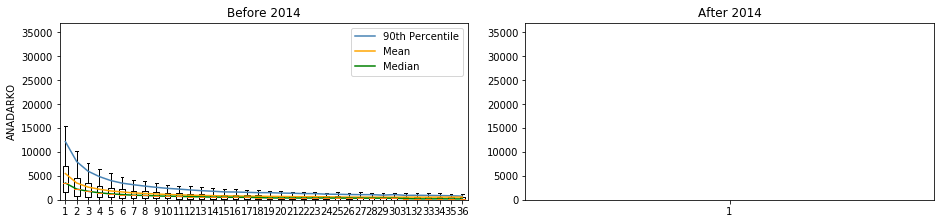

In [16]:
basin_names = ['ANADARKO BASIN', 'DENVER BASIN', 'PERMIAN BASIN', 'WILLISTON BASIN']

for basin in basin_names:
    basin_post_peak = df_post_peak[np.logical_and(df_post_peak['MonthIdx']<37, df_post_peak['API'].isin(df_wells[df_wells['BasinName']==basin]['API']))]
    
    basin_post_peak_pre = basin_post_peak[basin_post_peak['Year']<2014]
    basin_post_peak_pre_dist = basin_post_peak_pre.groupby(['MonthIdx'])['Liquid']
    
    basin_post_peak_post = basin_post_peak[basin_post_peak['Year']>=2014]
    basin_post_peak_post_dist = basin_post_peak_post.groupby(['MonthIdx'])['Liquid']
    plot_prod_curve(basin_post_peak_pre_dist, basin_post_peak_post_dist, basin.split(' ')[0])

Percentage of Oil Recovered Per Year

In [57]:
df_basins_mapped = pd.merge(df_post_peak[["API","MonthIdx","Liquid"]], df_wells[["API","BasinName"]], on='API', how='left')
df_basins_mapped = df_basins_mapped.drop(['API'], axis =1)
df_basins_mapped['MonthIdx'] = pd.to_numeric(df_basins_mapped['MonthIdx'], downcast='integer')
df_basins_mapped = df_basins_mapped.loc[df_basins_mapped['BasinName'].isin(basin_names)]
df_basins_prod = df_basins_mapped.groupby(["BasinName" , "MonthIdx"], as_index=False)["Liquid"].sum()
#df_basins_prod = pd.pivot_table(df_basins_mapped,values='Liquid', index= ['BasinName','MonthIdx'],aggfunc=np.sum)
#df_basins_prod = df_basins_prod.BasinName.isin(['ANADARKO BASIN', 'DENVER BASIN', 'PERMIAN BASIN', 'WILLISTON BASIN'])
df_basins_prod.to_csv("./data/allbasins1.csv")

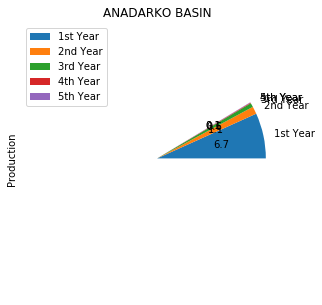

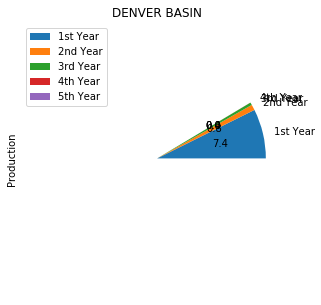

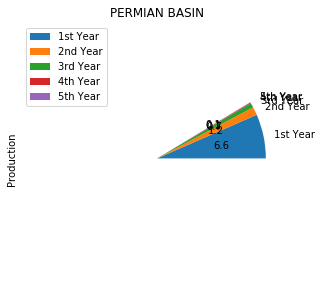

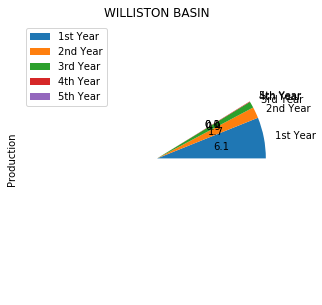

In [83]:
for basin in basin_names:
    df_basin = df_basins_prod.loc[df_basins_prod['BasinName']== basin]
    #df_basin = df_basin.reset_index(inplace=True)
    #df_basin = df_basin.set_index('MonthIdx', inplace=True)
    cumProd =  df_basin.loc[df_basin['MonthIdx'].between( 1,60, inclusive = True)]['Liquid'].sum()
    year1   = (df_basin.loc[df_basin['MonthIdx'].between( 1,12, inclusive = True)]['Liquid'].mean())
    year2   = (df_basin.loc[df_basin['MonthIdx'].between(13,24, inclusive = True)]['Liquid'].mean())
    year3   = (df_basin.loc[df_basin['MonthIdx'].between(15,36, inclusive = True)]['Liquid'].mean())
    year4   = (df_basin.loc[df_basin['MonthIdx'].between(37,48, inclusive = True)]['Liquid'].mean())
    year5   = (df_basin.loc[df_basin['MonthIdx'].between(49,60, inclusive = True)]['Liquid'].mean())
    df_to_plot = pd.DataFrame({'Production': [year1, year2, year3, year4, year5]},
                               index= ['1st Year', '2nd Year', '3rd Year', '4th Year', '5th Year']
                 )
    df_to_plot.plot.pie(y='Production', figsize=(5, 5), autopct='%.1f')
    plt.title(basin)
    plt.show()